In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [ ]:
data_dir="/content/drive/MyDrive/CNN architecture practice/Architectures/rooms_dataset"

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 40 files belonging to 2 classes.
Using 32 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 40 files belonging to 2 classes.
Using 8 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bedroom', 'diningroom']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
class_names=le.fit_transform(class_names)

In [ ]:
class_names

array([0, 1])

In [ ]:
from tensorflow.keras.utils import to_categorical

one_hot_labels = to_categorical(class_names, num_classes=2)
one_hot_labels

array([[1., 0.],
       [0., 1.]], dtype=float32)

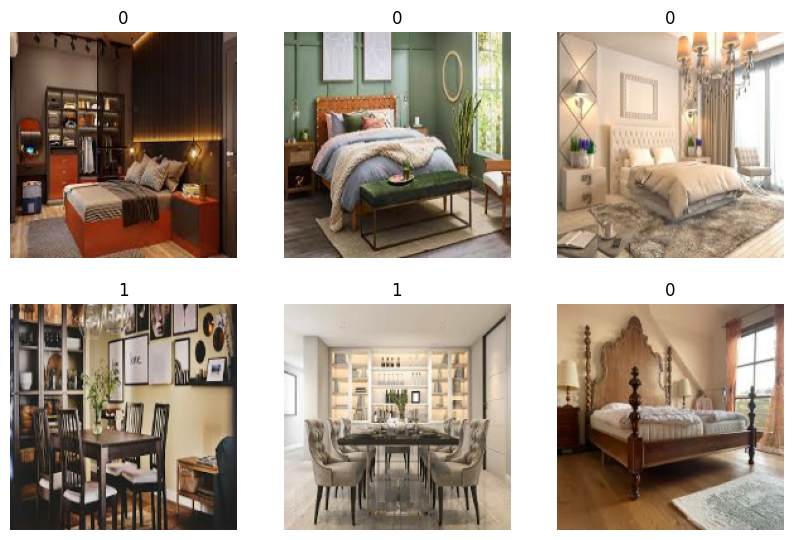

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

In [ ]:
resnet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_24 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_25 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_26 (ModuleWr  (None, 1)                513       
 apper)                                                          
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
__________________________________

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 11s 11s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 2/10
1/1 [==============================] - 7s 7s/step - loss: 0.0000e+00 - accuracy: 0.5312 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 0.0000e+00 - accuracy: 0.5312 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 0.0000e+00 - accuracy: 0.5312 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 5/10
1/1 [==============================] - 7s 7s/step - loss: 0.0000e+00 - accuracy: 0.5312 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 6/10
1/1 [==============================] - 6s 6s/step - loss: 0.0000e+00 - accuracy: 0.5312 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 7/10
1/1 [==============================] - 8s 8s/step - loss: 0.0000e+00 - accuracy: 0.5312 - val_loss: 0.0000e+00 - val_accuracy: 0

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
img_path1="/content/drive/MyDrive/CNN architecture practice/Architectures/rooms_dataset/diningroom/11.jpg"
img_path2="/content/drive/MyDrive/CNN architecture practice/Architectures/rooms_dataset/bedroom/1.jpg"
import cv2
image=cv2.imread(img_path1)
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [ ]:
pred=model.predict(image)


1/1 [==============================] - 0s 422ms/step


In [ ]:
print(pred[0])

[0. 1.]


In [ ]:

output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)


The predicted class is diningroom


In [ ]:
class_names

['bedroom', 'diningroom']

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
data_dir = '/content/drive/MyDrive/CNN architecture practice/Architectures/rooms_dataset'  # Replace with the actual path
batch_size = 32
num_epochs = 10
input_shape = (224, 224, 3)  # ResNet-50 input shape

# Create train and test data generators
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    subset='training'
)

test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    subset='validation'
)

# Load pre-trained ResNet-50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(
    train_generator,
    validation_data=test_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=test_generator.samples // batch_size,
    epochs=num_epochs
)

# Predict classes
test_predictions = model.predict(test_generator)
predicted_classes = tf.argmax(test_predictions, axis=1)

# Print predicted classes
print("Predicted classes:", predicted_classes)


Found 32 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Epoch 1/10
1/1 [==============================] - 58s 58s/step - loss: 0.9114 - accuracy: 0.3750
Epoch 2/10
1/1 [==============================] - 29s 29s/step - loss: 0.0781 - accuracy: 0.9688
Epoch 3/10
1/1 [==============================] - 27s 27s/step - loss: 0.0040 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 27s 27s/step - loss: 0.0455 - accuracy: 0.9688
Epoch 5/10
1/1 [==============================] - 27s 27s/step - loss: 0.0096 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 27s 27s/step - loss: 0.0018 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 27s 27s/step - loss: 0.0018 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 25s 25s/step - loss: 8.9975e-04 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 27s 27s/step - loss: 0.0032 - accuracy: 1.0000
Epoch 10/10
1/1 [===========================